# Data Exploration

In [1]:
import pandas as pd
import os

In [2]:
home_dir = os.path.expanduser('~')
print(home_dir)

csv_path = os.path.expanduser(r'~\Desktop\Projects\Sentiment Analysis\data\raw\IMDB Dataset.csv')
print(csv_path)

C:\Users\91705
C:\Users\91705\Desktop\Projects\Sentiment Analysis\data\raw\IMDB Dataset.csv


In [3]:
df = pd.read_csv(csv_path)
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nSample reviews:\n", df.head())


Shape: (50000, 2)

Columns: Index(['review', 'sentiment'], dtype='object')

Sample reviews:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Missing values


In [7]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
review       0
sentiment    0
dtype: int64


## Checking duplicates

In [8]:
print(df['review'].duplicated().sum())
# print(df['sentiment'].duplicated().sum())

418


In [9]:
duplicated_reviews = df[df['review'].duplicated()]
# duplicated_reviews = df[df['review'].duplicated(keep = 'last')]
print(duplicated_reviews)

                                                  review sentiment
3537   Quite what the producers of this appalling ada...  negative
3769   My favourite police series of all time turns t...  positive
4391   Beautiful film, pure Cassavetes style. Gena Ro...  positive
6352   If you liked the Grinch movie... go watch that...  negative
6479   I want very much to believe that the above quo...  negative
...                                                  ...       ...
49912  This is an incredible piece of drama and power...  positive
49950  This was a very brief episode that appeared in...  negative
49984  Hello it is I Derrick Cannon and I welcome you...  negative
49986  This movie is a disgrace to the Major League F...  negative
49991  Les Visiteurs, the first movie about the medie...  negative

[418 rows x 2 columns]


## Conflicting reviews

In [10]:
conflicting = duplicated_reviews.groupby('review')['sentiment'].nunique()
conflicting_reviews = conflicting[conflicting > 1] 
print(f"Number of conflicting reviews: {conflicting_reviews.shape[0]}")


Number of conflicting reviews: 0


## Class distribution

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

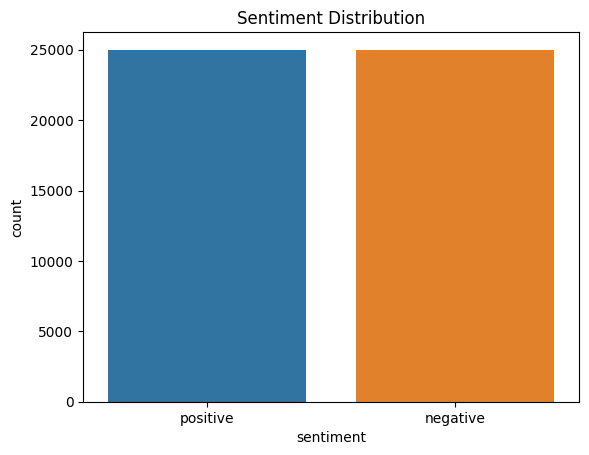

In [12]:
sns.countplot(x = 'sentiment', data = df)
plt.title("Sentiment Distribution")
plt.show()

## Review length analysis

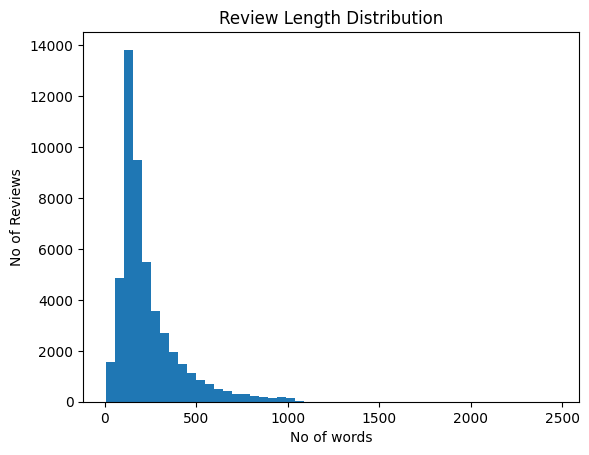

In [14]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
plt.hist(df['review_length'], bins = 50)
plt.title('Review Length Distribution')
plt.xlabel("No of words")
plt.ylabel('No of Reviews')
plt.show()